In [53]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import sys
sys.path.append("../core/simulations")
import simulations
import numpy as np
import matplotlib.pyplot as plt
import visuals

plt.style.use("ggplot")

# Muller-Brown Potential

In [3]:
mw_sim_1 = simulations.MuellerWellSim("configs/muller_well_config_1.yml")
mw_sim_1.runSimulation()
mw_sim_2 = simulations.MuellerWellSim("configs/muller_well_config_2.yml")
mw_sim_2.runSimulation()

In [4]:
a = np.array(mw_sim_1.coordinate_logger.coordinates)
b = np.array(mw_sim_2.coordinate_logger.coordinates)

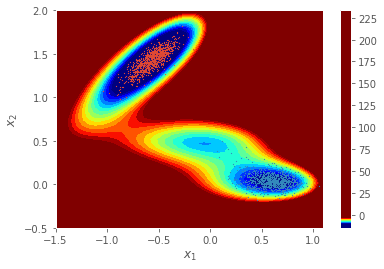

In [5]:
visuals.plot_2D_potential(mw_sim_1.central_potential, xlim = [-1.5, 1.1], ylim = [-0.5, 2], cmap = "jet")
plt.scatter(*a.T, s=0.5)
plt.scatter(*b.T, s=0.5)

# Double well Potential

In [6]:
dw_sim_1 = simulations.DoubleWellSim("configs/double_well_config_1.yml")
dw_sim_1.runSimulation()
dw_sim_2 = simulations.DoubleWellSim("configs/double_well_config_2.yml")
dw_sim_2.runSimulation()

In [7]:
a = np.array(dw_sim_1.coordinate_logger.coordinates)
b = np.array(dw_sim_2.coordinate_logger.coordinates)

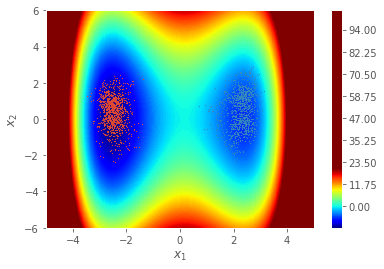

In [8]:
visuals.plot_2D_potential(dw_sim_1.central_potential, xlim = [-5, 5], ylim = [-6, 6], cmap = "jet", min = None, max = 20)
plt.scatter(*a.T, s=0.5)
plt.scatter(*b.T, s=0.5)

# Dimer Simulation (MD)

In [90]:
dimer_sim_md = simulations.DimerLJFluidSim("configs/dimer_sim_config_md.yml")

In [133]:
dimer_sim_md.runSimulation()

In [134]:
a = np.array(dimer_sim_md.coordinate_logger.coordinates)

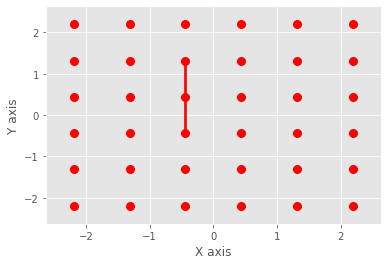

In [135]:
visuals.make_2D_traj_bond(a, dimer_sim_md.system.box, [[0, 1]])

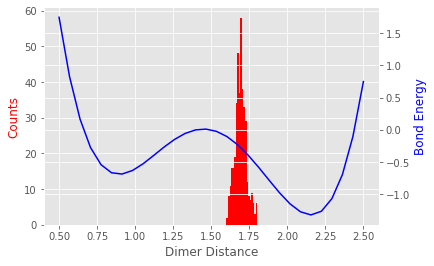

In [136]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dimer_sim_md.dist_logger.d[-400:]), bins = 20, color = "red")
ax1.tick_params(axis = 'y')

x = np.linspace(0.5, 2.5, 30)
y = np.array([dimer_sim_md.system.bonds[0].potential(x)]).reshape(-1)

ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

In [137]:
dimer_sim_md.system.bonds[0].get_energy()

-0.322421796813459

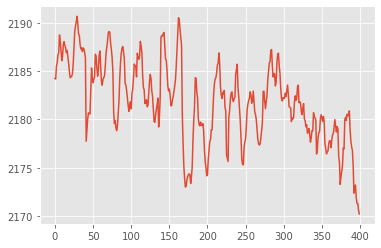

In [138]:
plt.plot(dimer_sim_md.energy_logger.H[-400:])
# plt.plot(dimer_sim_md.energy_logger.U[-400:])
# plt.plot(dimer_sim_md.energy_logger.K[-400:])


# Dimer Simulation (MC)

In [139]:
dimer_sim_mc = simulations.DimerLJFluidSim("configs/dimer_sim_config_mc.yml")

In [140]:
dimer_sim_mc.runSimulation()

In [141]:
a = np.array(dimer_sim_mc.coordinate_logger.coordinates)

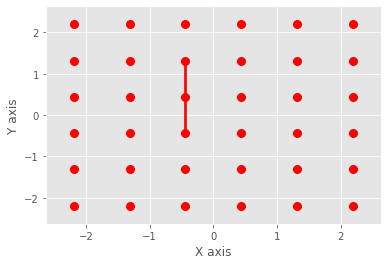

In [142]:
visuals.make_2D_traj_bond(a, dimer_sim_mc.system.box, [[0, 1]])

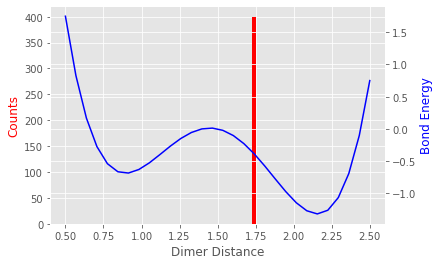

In [143]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dimer_sim_mc.dist_logger.d[-400:]), bins = 40, color = "red")
ax1.tick_params(axis = 'y')

x = np.linspace(0.5, 2.5, 30)
y = np.array([dimer_sim_mc.system.bonds[0].potential(x)]).reshape(-1)

ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

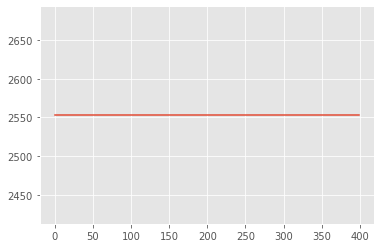

In [144]:
plt.plot(dimer_sim_mc.energy_logger.H[-400:])